<a href="https://colab.research.google.com/github/ClovisMonteiro/Python_para_Data_Science/blob/master/Projeto_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Olhando as notas em geral

In [0]:
import pandas as pd

notas = pd.read_csv("ratings.csv")

notas.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas.shape

(100836, 4)

In [0]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas.momento.describe()

count    1.008360e+05
mean     1.205946e+09
std      2.162610e+08
min      8.281246e+08
25%      1.019124e+09
50%      1.186087e+09
75%      1.435994e+09
max      1.537799e+09
Name: momento, dtype: float64

In [0]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [0]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [0]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [0]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

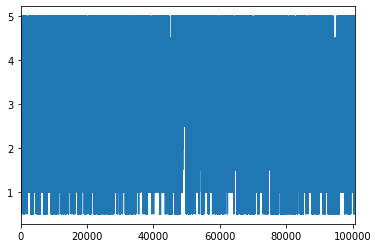

In [0]:
notas.nota.plot()

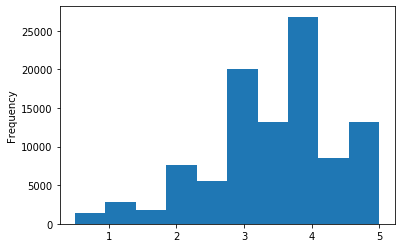

In [0]:
notas.nota.plot(kind='hist')

In [0]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

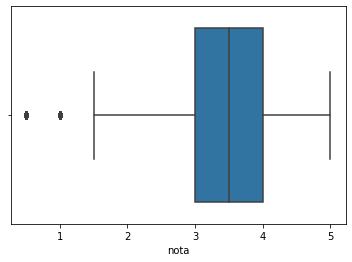

In [0]:
import seaborn as sns
#sns.boxplot(notas.nota)
teste = notas.nota
sns.boxplot(teste)

In [0]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
#filmes.head()
pesquisa = filmes.groupby('generos').count()
pesquisa.head(10)


,filmeId,titulo
generos,,
(no genres listed),34,34
Action,60,60
Action|Adventure,32,32
Action|Adventure|Animation,18,18
Action|Adventure|Animation|Children,6,6
Action|Adventure|Animation|Children|Comedy,5,5
Action|Adventure|Animation|Children|Comedy|Fantasy,3,3
Action|Adventure|Animation|Children|Comedy|IMAX,2,2
Action|Adventure|Animation|Children|Comedy|Romance,1,1


#Olhando os Filmes

In [0]:
import seaborn as sns

In [0]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Analisando algumas notas especificas por filme

In [0]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [0]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

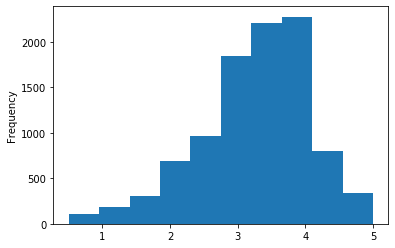

In [0]:
medias_por_filme.plot(kind = "hist")

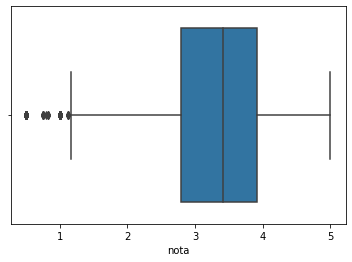

In [0]:
sns.boxplot(medias_por_filme)

In [0]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

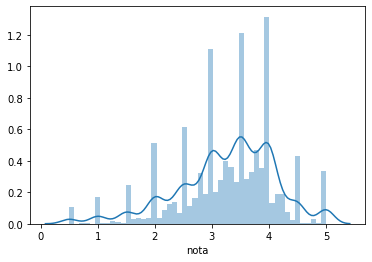

In [0]:
sns.distplot(medias_por_filme, bins=50)

Text(0.5, 1.0, 'Histograma das medias dos filme')

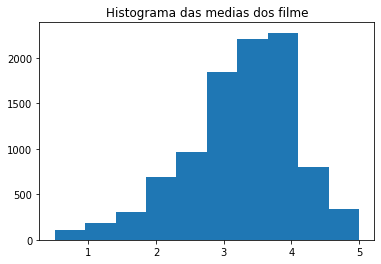

In [0]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das medias dos filme")

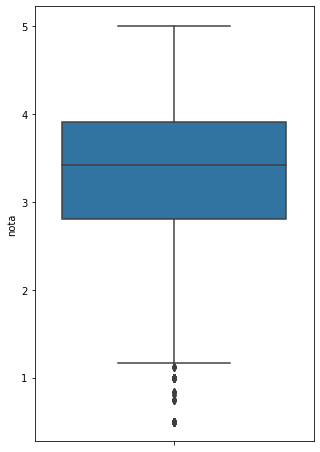

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

#Analisando dados do TMDB

In [0]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ar       2
ta       2
id       2
cs       2
ro       2
el       1
vi       1
xx       1
af       1
sl       1
pl       1
te       1
nb       1
no       1
ky       1
is       1
hu       1
tr       1
ps       1
Name: original_language, dtype: int64

In [0]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


In [0]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


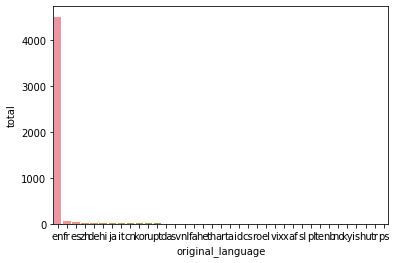

In [0]:
sns.barplot(x ="original_language", y="total", data = contagem_de_lingua)

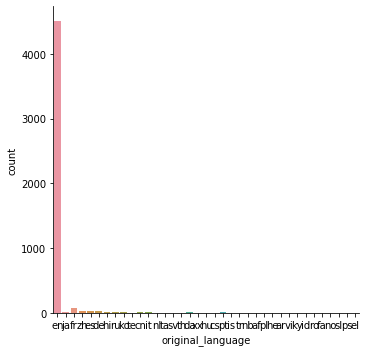

In [0]:
sns.catplot(x = "original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f2a1c881710>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

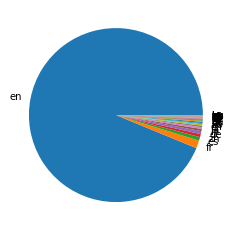

In [0]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [0]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


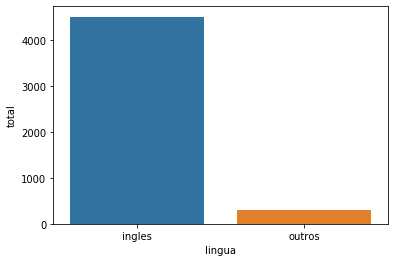

In [0]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]

}
dados = pd.DataFrame(dados)
sns.barplot(data = dados, x="lingua", y= "total")


([<matplotlib.patches.Wedge at 0x7f2a1c793940>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

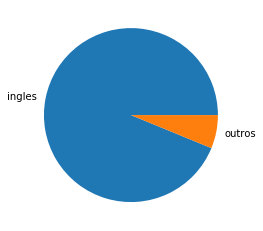

In [0]:
plt.pie(dados["total"], labels = dados["lingua"])

In [0]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
cs     2
ta     2
ar     2
ro     2
id     2
hu     1
is     1
af     1
te     1
nb     1
ps     1
no     1
pl     1
sl     1
tr     1
xx     1
vi     1
ky     1
el     1
Name: original_language, dtype: int64

In [0]:
filmes_sem_linguas_original_em_ingles =  tmdb.query("original_language != 'en'")

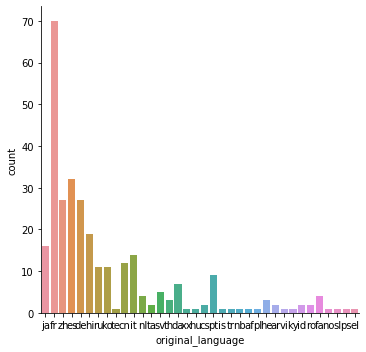

In [0]:
sns.catplot(x = "original_language", data = filmes_sem_linguas_original_em_ingles, kind="count")

#Revisando o papel da média, mediana, medidas de tendencia central, dispersão, desvio padrão, box plot, histograma

<Figure size 360x720 with 0 Axes>

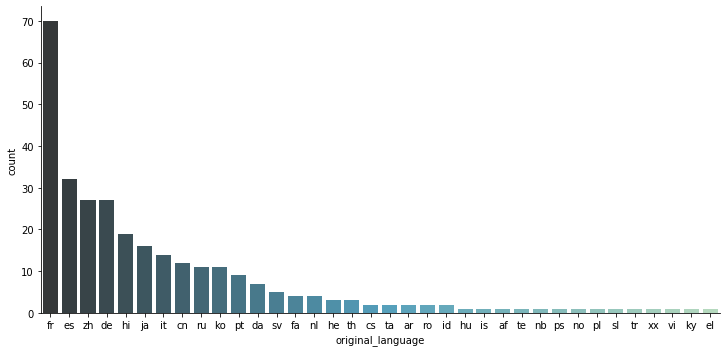

In [0]:

filmes_sem_linguas_original_em_ingles =  tmdb.query("original_language != 'en'")


plt.figure(figsize=(5,10))
sns.catplot(x = "original_language", data = filmes_sem_linguas_original_em_ingles, kind="count",
           aspect=2, 
           palette="GnBu_d", 
           order = total_por_lingua_de_outros_filmes.index)



In [0]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")

print(len(notas_do_toy_story), len(notas_do_jumanji) )

215 110


In [0]:
print("Nota média do Toy Story: %.2f " % notas_do_toy_story.nota.mean())

print("Nota média do jumanji: %.2f " % notas_do_jumanji.nota.mean())

Nota média do Toy Story: 3.92 
Nota média do jumanji: 3.43 


In [0]:
print("Nota mediana do Toy Story: %.2f " % notas_do_toy_story.nota.median())

print("Nota mediana do jumanji: %.2f " % notas_do_jumanji.nota.median())

Nota média do Toy Story: 4.00 
Nota média do jumanji: 3.50 


In [0]:
import numpy as np
filme1 = np.append( np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append( np.array([5] * 10), np.array([1] * 10))

In [0]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


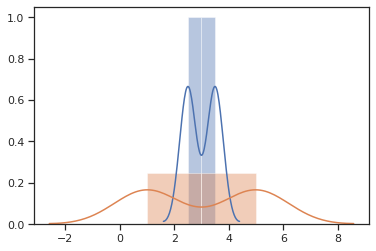

In [0]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

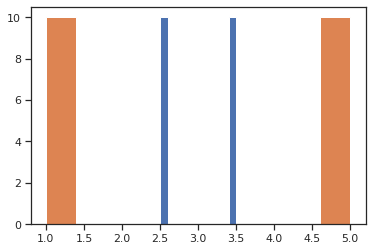

In [0]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2a1bc5c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2a1bc5ccf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2a1bc007b8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2a1bc00438>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2a1bc5c5f8>,
  <matplotlib.lines.Line2D at 0x7f2a1bd45278>]}

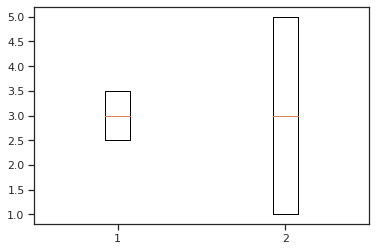

In [0]:
plt.boxplot([filme1, filme2])

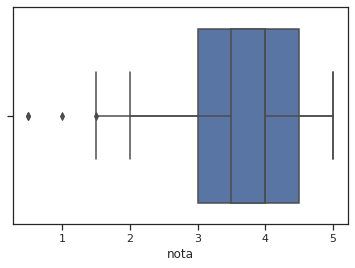

In [0]:
sns.boxplot(notas_do_toy_story.nota)
sns.boxplot(notas_do_jumanji.nota)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2a199cf0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2a199cfb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2a199da5c0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2a199da240>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2a19a12ef0>,
  <matplotlib.lines.Line2D at 0x7f2a199e4080>]}

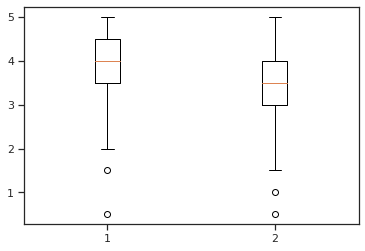

In [0]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

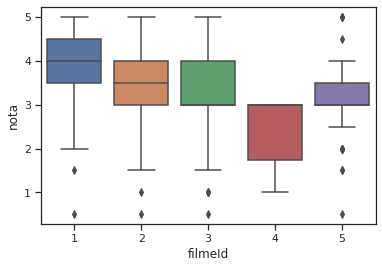

In [0]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in[1,2,3,4,5]"))

In [0]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455
